In [1]:
import scipy.io
import scipy.stats
import random
import numpy as np
import os
import itertools
import pickle as pk

import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

import sys, os
sys.path.append("/Users/xiaoxuanj/Dropbox/jim_data/human_behavior/1600_rep/")


In [2]:
with open("learning_6face_sizeembed_overtime_switch_effect_noforge_RT2000_boot_all_nonswaptoswap", 'rb') as f:
    u = pk._Unpickler(f)
    u.encoding = 'latin1'
    [dprime_mb_s_bt, dprime_mb_b_bt, percent_mb_s_bt, percent_mb_b_bt, dprime_mb_bt, CM_mb_bt] = u.load()
    

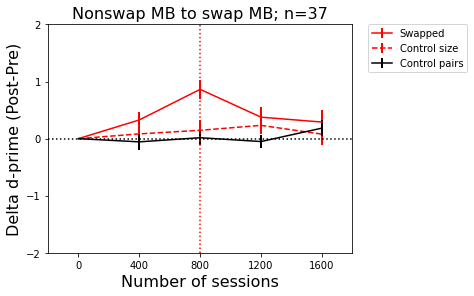

In [3]:
# Figure 2 plot
fig = plt.figure(figsize = (12,4.2))
ax = fig.add_subplot(121)
temp = []
for i in range(5):
    temp.append(dprime_mb_b_bt[:,i,0]-dprime_mb_b_bt[:,0,0])
ax.errorbar(np.linspace(1,5,5),np.ma.masked_invalid(temp).mean(1),np.ma.masked_invalid(temp).std(1),color = 'r', ecolor = 'r', label = 'Swapped',elinewidth=2)
np.save('switch_mb_b.npy', np.array(temp))

temp = []
for i in range(5):
    temp.append(dprime_mb_s_bt[:,i,0]-dprime_mb_s_bt[:,0,0])
ax.errorbar(np.linspace(1,5,5),np.ma.masked_invalid(temp).mean(1),np.ma.masked_invalid(temp).std(1),color = 'r', linestyle="dashed", ecolor = 'r', label = 'Control size',elinewidth=2)
np.save('switch_mb_s.npy', np.array(temp))

temp = []
for i in range(5):
    ttemp=[]
    for p in [1,2]:
        ttemp.append(dprime_mb_b_bt[:,i,p]-dprime_mb_b_bt[:,0,p])
    temp.append(ttemp)
temp=np.mean(temp,axis=1)
ax.errorbar(np.linspace(1,5,5),np.ma.masked_invalid(temp).mean(1),np.ma.masked_invalid(temp).std(1),color = 'k', ecolor = 'k', label = 'Control pairs',elinewidth=2)
np.save('switch_mb_b_other.npy', np.array(temp))


plt.plot([0.5,5.5],[0,0],':k')
plt.xlabel('Number of sessions',fontsize = 16)
plt.xlim(0.5,5.5)
plt.ylim(-2,2)
ax.set_yticks([-2,-1,0,1,2])
ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels([0,400,800,1200,1600])
plt.ylabel('Delta d-prime (Post-Pre)',fontsize = 16)
ax.tick_params(axis='y', direction='out')
ax.tick_params(axis='x', direction='out')
plt.title('Nonswap MB to swap MB; n=37',fontsize = 16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([3,3],[-2,2],':r')

#plt.savefig('/mindhive/dicarlolab/u/jiaxx/figures/figure2_learning_overtime_switch_new.pdf', format='eps', dpi=1000)



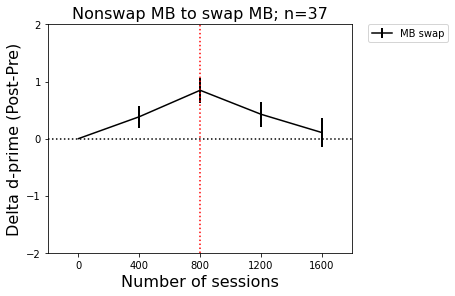

In [4]:
# Figure 2 plot
fig = plt.figure(figsize = (12,4.2))
ax = fig.add_subplot(121)
mb = []
for i in range(5):
    mb.append(dprime_mb_b_bt[:,i,0]-dprime_mb_b_bt[:,0,0])

ms = []
for i in range(5):
    ttemp=[]
    for p in [1,2]:
        ttemp.append(dprime_mb_b_bt[:,i,p]-dprime_mb_b_bt[:,0,p])
    ms.append(ttemp)
ms=np.mean(ms,axis=1)
    
effect = []
for i in range(100):
    #for j in range(100):
    effect.append(np.array(mb)[:,i]-np.array(ms)[:,i])
        
ax.errorbar(np.linspace(1,5,5),np.ma.masked_invalid(effect).mean(0),np.ma.masked_invalid(effect).std(0),color = 'k', ecolor = 'k', label = 'MB swap',elinewidth=2)


plt.plot([0.5,5.5],[0,0],':k')
plt.xlabel('Number of sessions',fontsize = 16)
plt.xlim(0.5,5.5)
plt.ylim(-2,2)
ax.set_yticks([-2,-1,0,1,2])
ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels([0,400,800,1200,1600])
plt.ylabel('Delta d-prime (Post-Pre)',fontsize = 16)
ax.tick_params(axis='y', direction='out')
ax.tick_params(axis='x', direction='out')
plt.title('Nonswap MB to swap MB; n=37',fontsize = 16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([3,3],[-2,2],':r')


#pp = PdfPages('/mindhive/dicarlolab/u/jiaxx/figures/figure2_learning_overtime_switch.pdf')

#plt.savefig('/mindhive/dicarlolab/u/jiaxx/figures/figure2_learning_effect_overtime_switch_new.pdf', format='eps', dpi=1000)

#pp.savefig(fig)
#pp.close()


In [6]:
np.save('switch_learning_effect.npy', np.array(effect))


In [6]:
def get_pval(tmp, val, m='left'):
    # tmp is a normal distribution of bootstrapped samples
    if len(tmp)>10:
        if m=='left':
            # distribution with mean smaller than 0
            pval = len(np.where(tmp>=0)[0])/len(tmp)
        else:
            # distribution with mean larger than 0
            pval = len(np.where(tmp<=0)[0])/len(tmp)
        return pval
    else:
        print('empty entry')

In [7]:
for i in np.arange(1,5):
    tmp = np.ma.masked_invalid(effect)[:,i].data
    pval = get_pval(tmp, 1, m='right')
    print(pval)

0.0
0.0
0.02
0.32


In [5]:
# t-test compared to 0
from scipy.stats import ttest_ind, ttest_1samp
for i in np.arange(1,5):
    t, p = ttest_1samp(np.ma.masked_invalid(effect)[:,i].data,0)
    print(t, p)

20.062218249773228 1.1764556701156864e-36
38.80444569454927 1.0774028871017044e-61
19.489014942825477 1.1682793127816543e-35
4.291764015033242 4.134606671012164e-05


In [9]:
# confidence intervals
alpha = 0.95
tmp = np.ma.masked_invalid(effect)[:,4].data
p = ((1.0-alpha)/2.0) * 100
lower = np.percentile(tmp, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = np.percentile(tmp, p)
print('95% confidence interval ', upper, lower, )

95% confidence interval  0.5748533650361347 -0.3991521182972845
